# Contents

import libraries and data

remove missing values

remove categorical columns

standardise data with standardscaler

elbow technique

run the KMeans algorithm

discuss the clusters

# Import libraries and data

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.preprocessing import StandardScaler

In [94]:
path=r'/Users/vanessalimsingh/Achievement 6 June 2024'

In [95]:
df=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','who_df_v2_updatedregionnames.csv'))

In [96]:
#checkign for missing values as this can't be included in kmeans analysis
missing_values = df.isnull().sum()
missing_values

Unnamed: 0                    0
Region Code                   0
Region Name                   0
Country                       0
Year                          0
Sex                           0
Age Group                     0
Resp Deaths                   0
Resp Deaths %                 0
AS_Death rate/100 000    285081
Death rate/100 000        16090
Age Group Flag            22571
Resp Deaths % levels          0
dtype: int64

In [97]:
missing_flag_rows = df[df['Age Group Flag'].isnull()]
missing_flag_rows.head()

,Unnamed: 0,Region Code,Region Name,Country,Year,Sex,Age Group,Resp Deaths,Resp Deaths %,AS_Death rate/100 000,Death rate/100 000,Age Group Flag,Resp Deaths % levels
0,0,EU,Europe,Albania,1987,Male,[All],311.0,3.227480,37.464405,19.631360,NaN,Low levels
23,23,EU,Europe,Albania,1987,Female,[All],204.0,2.652796,17.887201,13.673839,NaN,Low levels
24,24,EU,Europe,Albania,1987,All,[All],515.0,2.972411,26.313233,16.741978,NaN,Low levels
66,66,EU,Europe,Albania,1988,All,[All],537.0,3.108898,26.932293,17.112265,NaN,Low levels
82,82,EU,Europe,Albania,1988,Male,[All],319.0,3.300569,37.740636,19.738878,NaN,Low levels


#### Age group flags with 'nan' will be removed as this only occurs where age group is 'all' or 'unknown'.

In [99]:
df = df.dropna(subset=['Age Group Flag'])

In [100]:
df[df['Age Group Flag'].isnull()]

,Unnamed: 0,Region Code,Region Name,Country,Year,Sex,Age Group,Resp Deaths,Resp Deaths %,AS_Death rate/100 000,Death rate/100 000,Age Group Flag,Resp Deaths % levels


In [101]:
#dropping categorical columns
df=df.drop(['Unnamed: 0','Region Code','Region Name','Country','Sex','Resp Deaths % levels','Age Group','AS_Death rate/100 000','Death rate/100 000'],axis=1)

In [102]:
df.head()

,Year,Resp Deaths,Resp Deaths %,Age Group Flag
1,1987,5.0,0.376506,0.0
2,1987,7.0,1.112878,1.0
3,1987,0.0,0.000000,2.0
4,1987,92.0,4.132974,18.0
5,1987,78.0,4.758999,17.0


In [103]:
#standardise data using a standard scaler
scaler = StandardScaler()

In [104]:
segmentation_std = scaler.fit_transform(df)

#### Use the elbow technique

In [106]:
#defines the range of potential clusters in the data
num_cl=range(1,10) 

In [107]:
kmeans = [KMeans(n_clusters=i) for i in num_cl] #defines k-means clusters in the range assigned above.

In [108]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.
score

[-505463221326.3076,
 -227275999186.84192,
 -115558829168.10959,
 -70003414934.9072,
 -51420735429.9733,
 -34475110845.90434,
 -23158241441.277905,
 -17632993888.06438,
 -14188480107.521992]

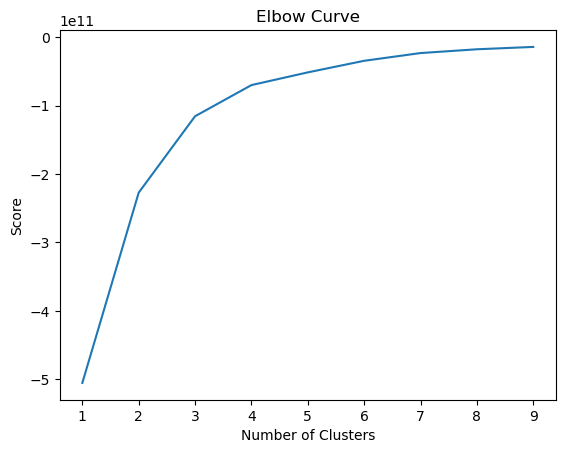

In [109]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The curve straightens out after 4, therefore we will use 4 as the optimal count for clusters.

### Run the k-means algorithm.

In [112]:
kmeans=KMeans(n_clusters=4)

In [113]:
#fit the k-means object to the data
kmeans.fit(df)

KMeans(n_clusters=4)

In [114]:
df['clusters']=kmeans.fit_predict(df)

In [115]:
df.head()

,Year,Resp Deaths,Resp Deaths %,Age Group Flag,clusters
1,1987,5.0,0.376506,0.0,3
2,1987,7.0,1.112878,1.0,3
3,1987,0.0,0.000000,2.0,3
4,1987,92.0,4.132974,18.0,3
5,1987,78.0,4.758999,17.0,3


In [116]:
df['clusters'].value_counts()

clusters
3    267121
0      8171
2      1350
1       184
Name: count, dtype: int64

Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

In [118]:
# Plot the clusters for the "Year" and "Resp Deaths %" variables.

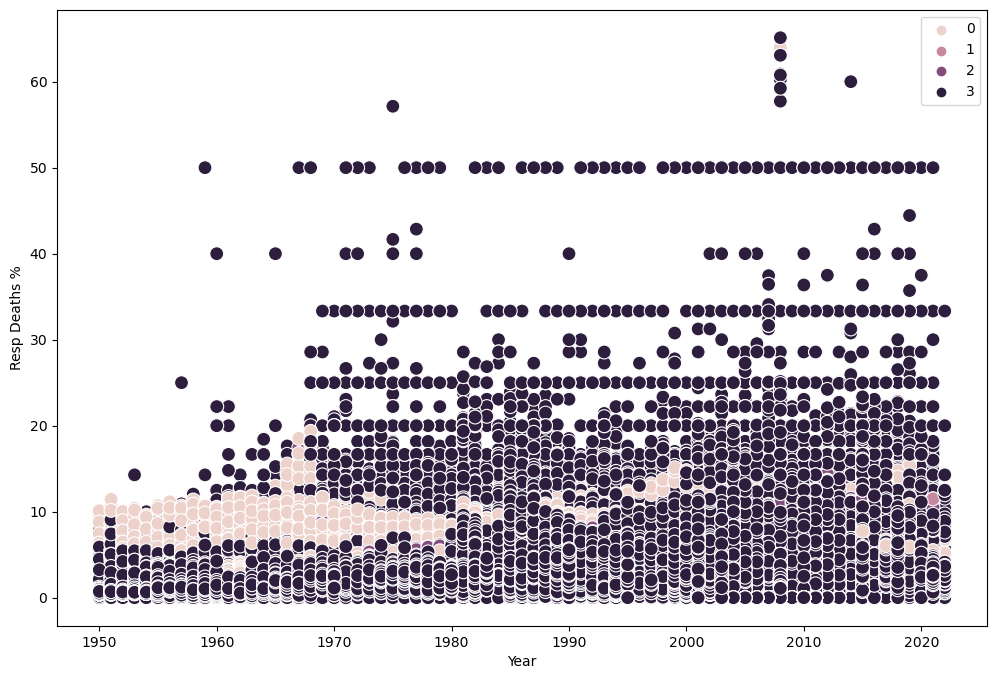

In [119]:
plt.figure(figsize=(12,8))
ax1 = sns.scatterplot(x=df['Year'], y=df['Resp Deaths %'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax1.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('Resp Deaths %') # Label y-axis.
plt.show()

In [120]:
#export the graph
ax1.figure.savefig('RespDeathsRate_year.png')

# Discuss the clusters

While there is no visible linear connection, the dark purple cluster (2) is most prevalent from 1950-1970s. 
In the period before 1960s, we do not see any values that are extremely high. This only becomes more common from around 1960. 
Most of the dark purple clusters are also below the 20% mark on the y-axis. 
This could mean that lower percentages of respiratory deaths were more common before the 1980s. 

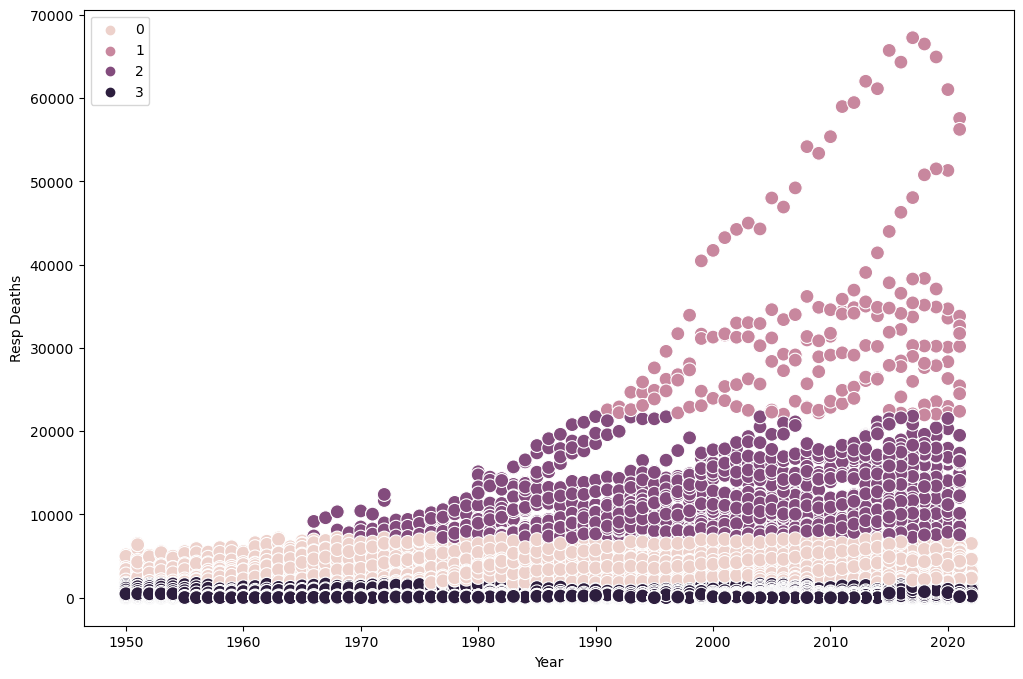

In [123]:
# Plot the clusters for the "Year" and "Resp Deaths" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['Resp Deaths'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('Resp Deaths') # Label y-axis.
plt.show()

In [124]:
#export the graph
ax.figure.savefig('respdeaths_year.png')

# Discuss the clusters.

The black clusters shown above start to become more prevalent after 1990 and see higher values on the y-axis (respiratory deaths). 
This shows that after 1990, the total number of respiratory deaths started to increase significantly, when compared to the rest of the data points. 

The lightest coloured cluster (0) and the dark purple cluster (2) seem to have a consistent range of respiratory death numbers throughout the years.

The pink cluster (1) starts to appear around 1965 and total respiratory deaths start to increase from then on. 

### Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [128]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [129]:
df.groupby('cluster').agg({'Year':['mean', 'median'], 
                         'Resp Deaths':['mean', 'median'], 
                         'Resp Deaths %':['mean', 'median'],
                          'Age Group Flag':['mean', 'median']})

Year           Resp Deaths          Resp Deaths %  \
                    mean  median          mean   median          mean   
cluster                                                                 
dark purple  2001.734074  2003.0  11056.577037   9796.0      7.178109   
pink         1994.555501  1997.0   3333.527598   2917.0      6.311666   
purple       2009.668478  2011.0  32803.836957  30240.0      8.169937   

                      Age Group Flag         
               median           mean median  
cluster                                      
dark purple  7.081672      16.008148   16.0  
pink         6.009471      15.023131   16.0  
purple       7.924362      17.059783   18.0

# Propose what these results could be useful for in future steps of an analytics pipeline.

Purple and dark purple clusters see the highest respiratory death percentages and they both have a median Age Group Flag of 16 (age group 75-79). This could mean that people aged 75+ are most vulnerable to respiratory deaths. 

The pink clusster, which has the lower respiratory death %s, also have a lower age group flag (40-44), which could mean younger people are less vulnerable to respiratory deaths. 

For the purple cluster, which sees the highest respiratory death percentages, the mean of the year is also more recent. This could mean that respiratory death rates started to increase through the years. 


# These results could be used to explore:
- Whether the age groups 75+ are most vulnerable to respiratory deaths in specific regions
- Whether age age groups 44 and below are least vulnerable to respiratory deaths in specific regions
- Does coal emissions or other factors that contribute to air pollution coincide with the increase we see in respiratory death rates.